## Imports and Setup

In this section, we import necessary libraries and set up constants and configurations for the project. This includes importing libraries for data manipulation, machine learning, and data visualization, as well as setting paths and parameters for data loading and processing.


In [1]:
import numpy as np 
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [4]:
DATASET_DIR = 'D:\college\Projects\Rice Disease detection\Rice_Leaf_AUG'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\venka\AppData\Local\Temp\ipykernel_235468\2530983137.py:1: SyntaxWarning: invalid escape sequence '\c'
  DATASET_DIR = 'D:\college\Projects\Rice Disease detection\Rice_Leaf_AUG'


## Data Preparation

Here, we prepare the data for training, validation, and testing. We use `ImageDataGenerator` to load and preprocess images from the directory. The data is then split into training, validation, and test sets.


In [5]:
datagen = ImageDataGenerator(rescale=1./255)
all_data_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

Found 3829 images belonging to 6 classes.


In [6]:
filenames = all_data_gen.filepaths
classes = all_data_gen.classes
class_labels = list(all_data_gen.class_indices.keys())

data = pd.DataFrame({
    'filename': filenames,
    'class': [class_labels[k] for k in classes]
})

train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=SEED)
val_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['class'], random_state=SEED)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 3063 validated image filenames belonging to 6 classes.
Found 383 validated image filenames belonging to 6 classes.
Found 383 validated image filenames belonging to 6 classes.


## Model Creation and Compilation

In this part, we define the model architecture using EfficientNetB0 as a base model with additional dense layers. The model is then compiled with a specified optimizer, loss function, and metric.


In [7]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Model Training

We train the model using the training and validation datasets for a specified number of epochs. The training process includes evaluation of the model's performance on the validation set.


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


c:\Users\venka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.4674 - loss: 1.4340 - val_accuracy: 0.1723 - val_loss: 1.7958
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.8784 - loss: 0.3827 - val_accuracy: 0.1645 - val_loss: 1.7978
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 334s 3s/step - accuracy: 0.9610 - loss: 0.1361 - val_accuracy: 0.1619 - val_loss: 1.8323
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 357s 4s/step - accuracy: 0.9880 - loss: 0.0538 - val_accuracy: 0.1749 - val_loss: 1.8250
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 386s 4s/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.1697 - val_loss: 2.0829
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 353s 4s/step - accuracy: 0.9878 - loss: 0.0421 - val_accuracy: 0.1802 - val_loss: 3.4540
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 337s 3s/step - accuracy: 0.9921 - loss: 0.0291 - val_accuracy: 0.3029 - val_loss: 2.6232
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 338s 4s/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.7050 - val_loss: 1.

## Model Evaluation

After training, we evaluate the model's performance on the test dataset to determine its accuracy and loss. This helps us understand how well the model generalizes to new, unseen data.


In [9]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

383/383 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9274 - loss: 0.2449
Test accuracy: 0.91


## Fine-Tuning

In this section, we fine-tune the model by setting a lower learning rate and retraining it for additional epochs. This helps improve the model's performance by adjusting the weights more subtly.


In [10]:
model.trainable = True
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.9920 - loss: 0.0204 - val_accuracy: 0.9634 - val_loss: 0.1121
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 354s 4s/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9687 - val_loss: 0.0951
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.9985 - loss: 0.0069 - val_accuracy: 0.9713 - val_loss: 0.0932
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 347s 4s/step - accuracy: 0.9976 - loss: 0.0096 - val_accuracy: 0.9765 - val_loss: 0.0872
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 380s 4s/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.9739 - val_loss: 0.0884
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 340s 4s/step - accuracy: 0.9973 - loss: 0.0069 - val_accuracy: 0.9739 - val_loss: 0.0911
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.9990 - loss: 0.0054 - val_accuracy: 0.9739 - val_loss: 0.1028
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 339s 4s/step - accuracy: 0.9975 - loss: 0.0061 - val_accuracy: 0.9765 - v


## Evaluation After Fine-Tuning

We evaluate the model again on the test dataset after fine-tuning to see if there is an improvement in accuracy and loss.


In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

383/383 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9761 - loss: 0.1069
Test accuracy: 0.97


## Prediction and Visualization

Finally, we select a random sample of images from the test set, make predictions using the trained model, and visualize the results. This helps us compare the predicted labels with the actual labels and assess the model's performance visually.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


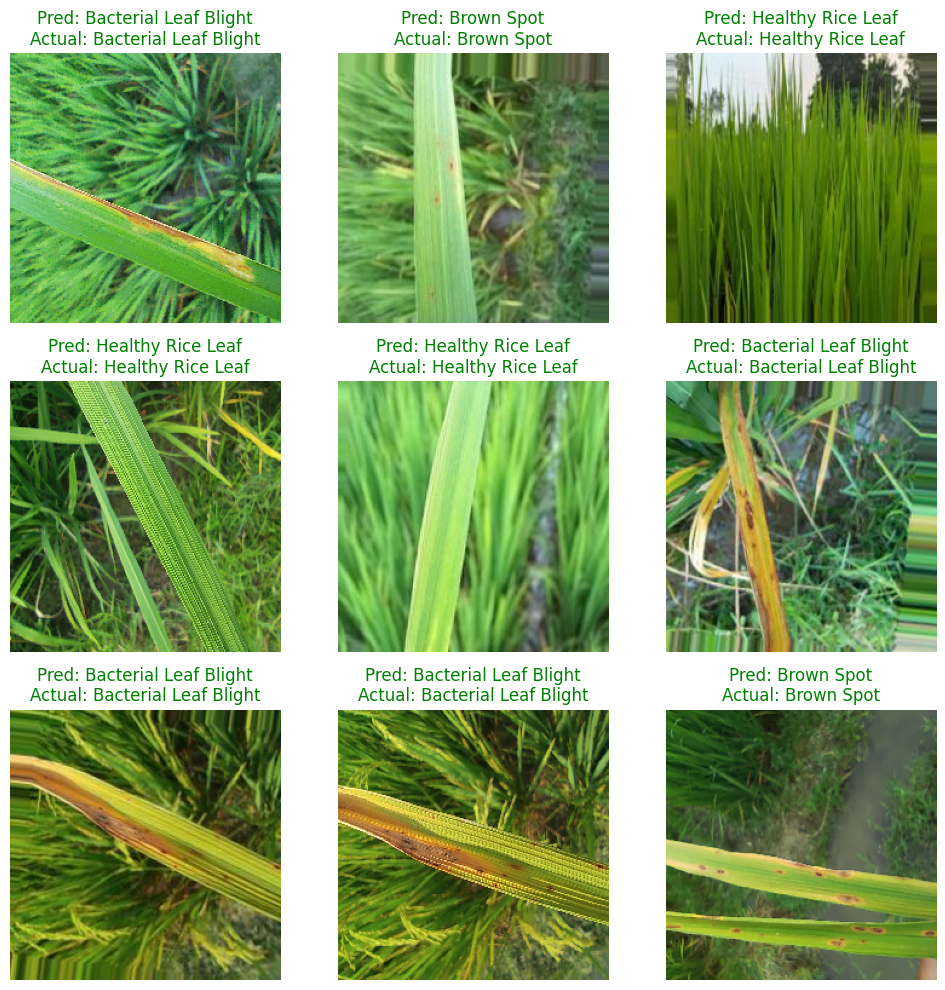

In [13]:
filenames = test_generator.filenames
classes = test_generator.classes
labels = list(test_generator.class_indices.keys())

random_indices = random.sample(range(len(filenames)), 9)
images = []
actual_labels = []
predicted_labels = []

for idx in random_indices:
    img, label = test_generator[idx]
    images.append(img[0])
    actual_labels.append(classes[idx])
    pred = model.predict(img)
    predicted_labels.append(np.argmax(pred))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    actual_class = labels[actual_labels[i]]
    predicted_class = labels[predicted_labels[i]]
    color = 'green' if actual_class == predicted_class else 'red'
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()